# NACA 4-Digit Airfoil Generator
This notebook will generate sets of points defining the camberline and surface of any NACA 4-digit airfoil

The user must provide:
 - The desired 4-digits for the airfoil defining the location of camber, maximum camber, and airfoil thickness
 
The outputs of this program include
 - Points defining the camberline in the current directory
 - Points defining the surface of the airfoil in the current directory.
 
Once those are provided you simply need to run all the cells in the notebook to generate the output. A NACA 0012 demonstration case is included by default. The camberline and surface files can be copied into the thin airfoil and vortex panel solver folders.

Import some useful libraries.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Define the gererator

In [2]:
def generator(m, p, t, n):
    # Convert the NACA digits to their actual values
    m = m / 100
    p = p / 10
    t = t / 100

    # Initialize the arrays for the camber line and upper and lower surface
    x_c = np.zeros((n, 2))
    x_u = np.zeros((n, 2))
    x_l = np.zeros((n, 2))

    # Generate the camber line
    for i in range(0, n):
        # Get the position of this point along the chord
        x = i / (n - 1)

        # Apply a cosine redistribution
        x = 0.5 * (math.cos(math.pi * x + math.pi) + 1)

        # Get the values for the camber line
        x_c[i, 0] = x
        if x < p:
            x_c[i, 1] = m / p ** 2 * (2 * p * x - x ** 2)
        else:
            x_c[i, 1] = m / (1 - p) ** 2 * ((1 - 2 * p) + 2 * p * x - x ** 2)

        # Get the values for the thickness and upper and lower surfaces
        y_t = 5 * t * (0.2969 * math.sqrt(x) - 0.1260 * x - 0.3516 * x ** 2 + 0.2843 * x ** 3 - 0.1036 * x ** 4)
        if x < p:
            dyc_dx = 2 * m / p ** 2 * (p - x)
        else:
            dyc_dx = 2 * m / (1 - p) ** 2 * (p - x)

        theta = math.atan(dyc_dx)

        x_l[i, 0] = x + y_t * math.sin(theta)
        x_l[i, 1] = x_c[i, 1] - y_t * math.cos(theta)
        x_u[i, 0] = x - y_t * math.sin(theta)
        x_u[i, 1] = x_c[i, 1] + y_t * math.cos(theta)

    # Save the camber line to disk
    np.savetxt('camberline.txt', x_c, delimiter=' ')

    # Append the upper and lower surfaces to create the airfoil geometry
    x = np.append(np.flipud(x_u), x_l[1:n, :], axis=0)

    # Save the airfoil geometry to disk
    np.savetxt('airfoil.txt', x, delimiter=' ')

    # Plot the camber line and geometry and save to disk
    fig, plot = plt.subplots()
    plot.plot(x[:, 0], x[:, 1], label='Surface')
    plot.plot(x_c[:, 0], x_c[:, 1], label='Camber Line')
    plot.set_xlabel('x/c')
    plot.set_ylabel('y/c')
    plot.set_title('NACA ' + str(int(m * 100)) + str(int(p * 10)) + str(int(t * 100)))
    plot.set_ylim([-0.5, 0.5])
    plot.legend()
    plt.show()
    fig.savefig('airfoil.pdf')

Choose the airfoil parameters and generate everything

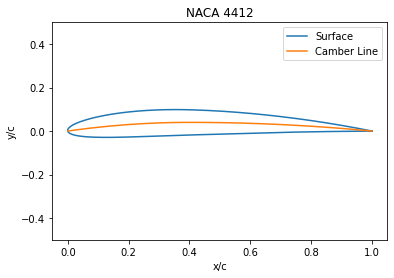

In [4]:
# Enter the four digits defining the airfoil shape
m = 0
p = 0
t = 12

# Enter the desired number of points on the camber line
n = 100

# Call the airfoil generator
generator(m, p, t, n)